# Time Series

---
Author: Anatoliy Durkin

Updated: 18.05.2025

---
В данном ноутбуке рассмотрены методы работы с временными рядами

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv('time_series_train.csv')
df_test = pd.read_csv('time_series_test.csv')

In [5]:
df_train

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808
...,...,...,...,...
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899


In [6]:
df_test

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845
...,...,...,...,...
25545,2019-12-27,6,9,901
25546,2019-12-28,6,9,926
25547,2019-12-29,6,9,913
25548,2019-12-30,6,9,899


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


## Работа с датой

In [8]:
pd.to_datetime('2025-02-15T12:30:45', format='%Y-%m-%dT%H:%M:%S')

Timestamp('2025-02-15 12:30:45')

In [9]:
pd.to_datetime('2025-02-15T12:30:45', format='%Y-%m-%dT%H:%M:%S') + pd.Timedelta(days=3)

Timestamp('2025-02-18 12:30:45')

In [10]:
pd.to_datetime('2025-02-15 12:30:45') - pd.to_datetime('2025-02-11 22:10:15')

Timedelta('3 days 14:20:30')

In [11]:
pd.to_datetime(df_train['Date'], format='%Y-%m-%d')

,Date
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05
...,...
230085,2018-12-27
230086,2018-12-28
230087,2018-12-29
230088,2018-12-30


In [12]:
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%Y-%m-%d')

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   store        230090 non-null  int64         
 2   product      230090 non-null  int64         
 3   number_sold  230090 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.0 MB


In [14]:
df_train.set_index('Date', inplace=True)

In [15]:
df_train.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


In [16]:
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%Y-%m-%d')
df_test.set_index('Date', inplace=True)

In [17]:
df_train.index.is_monotonic_increasing

False

In [18]:
df_train.resample('1w').sum()

<ipython-input-18-3627836503>:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df_train.resample('1w').sum()


,store,product,number_sold
Date,,,
2010-01-03,630,945,164693
2010-01-10,1470,2205,383832
2010-01-17,1470,2205,383627
2010-01-24,1470,2205,382977
2010-01-31,1470,2205,383274
...,...,...,...
2018-12-09,1470,2205,387654
2018-12-16,1470,2205,387456
2018-12-23,1470,2205,387980


In [19]:
df1, df2 = train_test_split(df_train, test_size=0.2, shuffle=False)

In [20]:
df1

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
...,...,...,...
2018-12-27,5,5,899
2018-12-28,5,5,883
2018-12-29,5,5,890


In [21]:
df2

,store,product,number_sold
Date,,,
2010-01-01,5,6,971
2010-01-02,5,6,974
2010-01-03,5,6,968
2010-01-04,5,6,978
2010-01-05,5,6,963
...,...,...,...
2018-12-27,6,9,890
2018-12-28,6,9,892
2018-12-29,6,9,895


## Данные

Выберем магазин и товар, которые в дальнейшем будем рассматривать.

<Axes: xlabel='Date'>

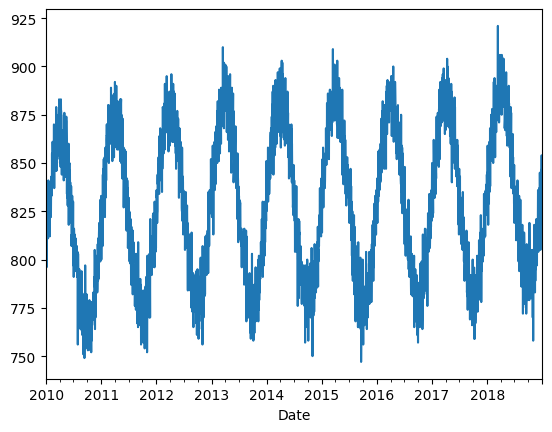

In [22]:
df_train[(df_train['store']==0)&(df_train['product']==0)]['number_sold'].plot()

In [23]:
train = df_train[(df_train['store']==0)&(df_train['product']==0)].drop(['store','product'], axis=1)
test = df_test[(df_test['store']==0)&(df_test['product']==0)].drop(['store','product'], axis=1)

Выберите также второй набор, с которым в дальнейшем будете выполнять манипуляции самостоятельно. Выберите интресный вариант.

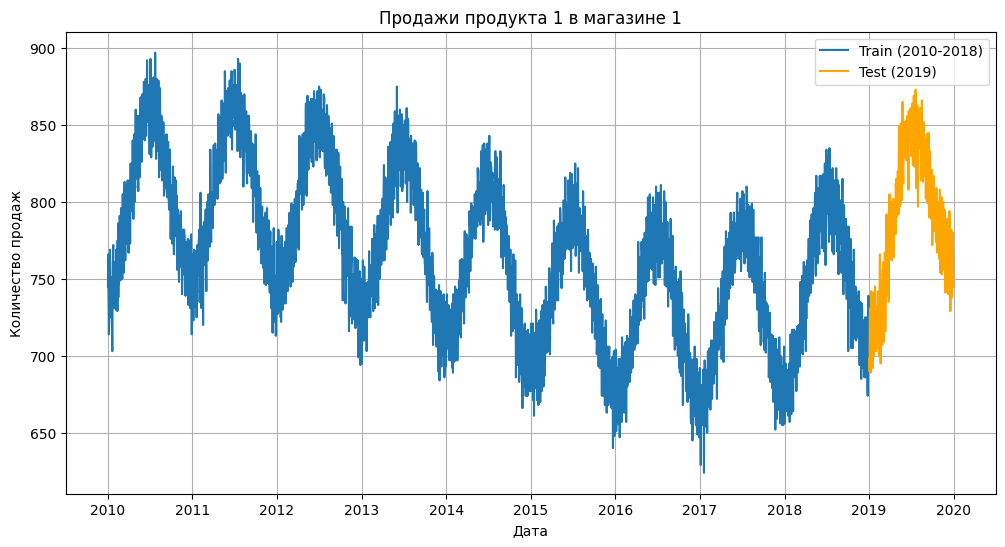

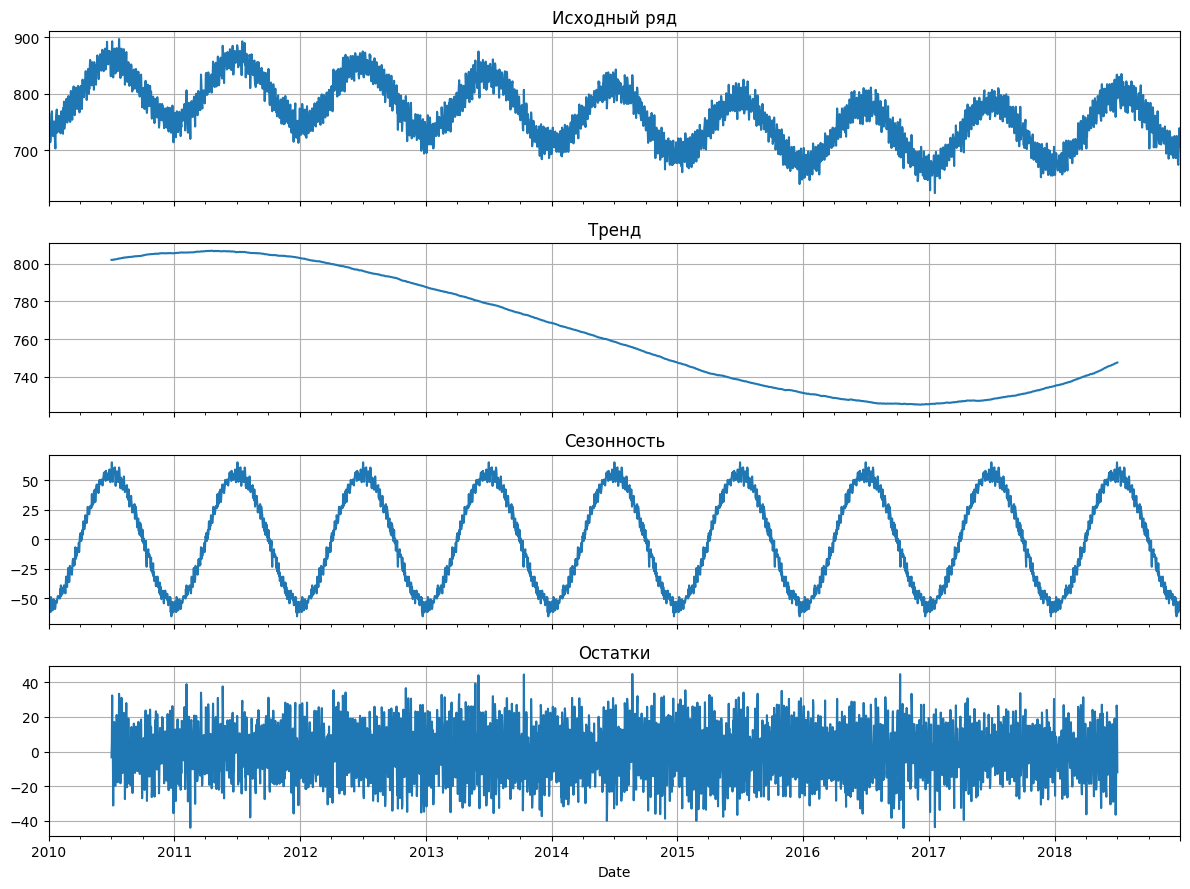

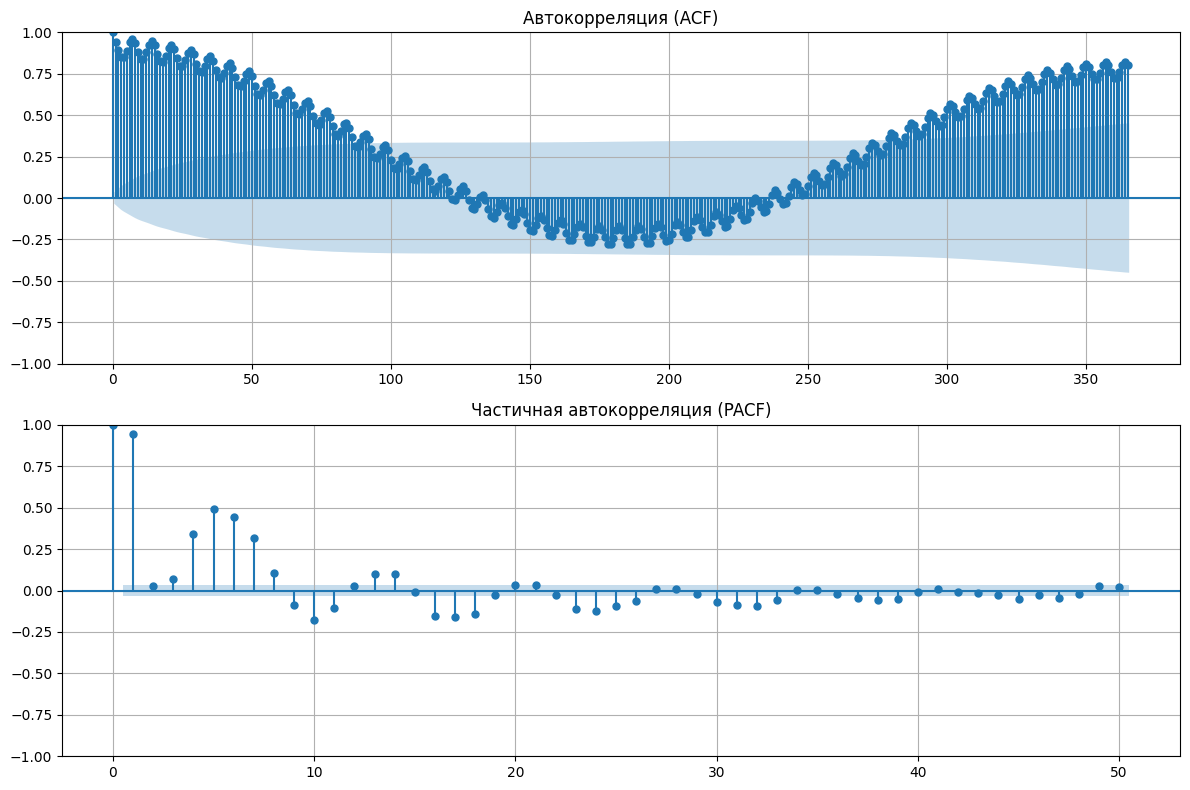

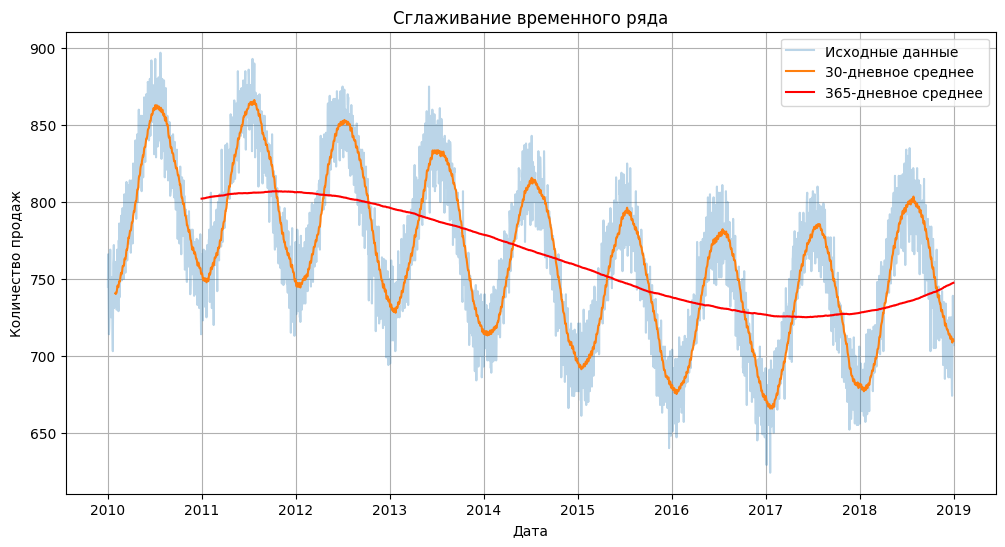

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

train1 = df_train[(df_train['store']==1)&(df_train['product']==1)].drop(['store','product'], axis=1)
test1  = df_test[(df_test['store']==1)&(df_test['product']==1)].drop(['store','product'], axis=1)

# 2. Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1['number_sold'], label='Train (2010-2018)')
plt.plot(test1.index,  test1['number_sold'],  label='Test (2019)', color='orange')
plt.title('Продажи продукта 1 в магазине 1')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.legend()
plt.grid(True)
plt.show()

# 3. Сезонная декомпозиция (аддитивная модель, годовая периодичность)
decomp = seasonal_decompose(train1['number_sold'], model='additive', period=365)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)
decomp.observed.plot(ax=axes[0], title='Исходный ряд')
decomp.trend.plot(ax=axes[1],    title='Тренд')
decomp.seasonal.plot(ax=axes[2], title='Сезонность')
decomp.resid.plot(ax=axes[3],    title='Остатки')
for ax in axes:
    ax.grid(True)
plt.tight_layout()
plt.show()

# 4. ACF и PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train1['number_sold'], lags=365, ax=axes[0])
axes[0].set_title('Автокорреляция (ACF)')
axes[0].grid(True)

plot_pacf(train1['number_sold'], lags=50, ax=axes[1])
axes[1].set_title('Частичная автокорреляция (PACF)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 5. Скользящие средние сглаживания
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1['number_sold'], alpha=0.3, label='Исходные данные')
plt.plot(train1.index, train1['number_sold'].rolling(window=30).mean(), label='30-дневное среднее')
plt.plot(train1.index, train1['number_sold'].rolling(window=365).mean(), label='365-дневное среднее', color='red')
plt.title('Сглаживание временного ряда')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.legend()
plt.grid(True)
plt.show()

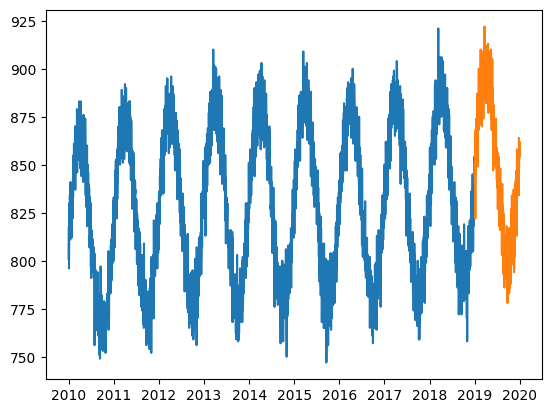

In [30]:
plt.plot(train)
plt.plot(test)

## Сглаживание

<Axes: xlabel='Date'>

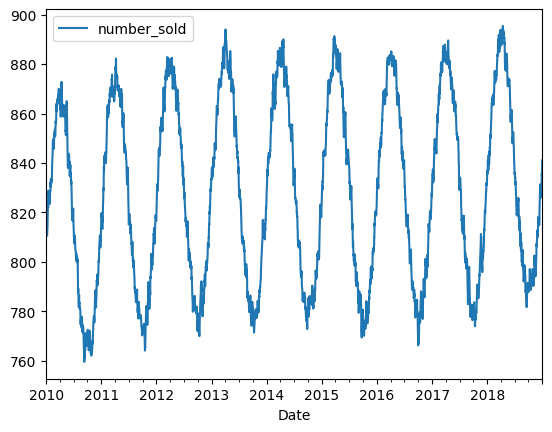

In [31]:
train.rolling(window=7).mean().plot()

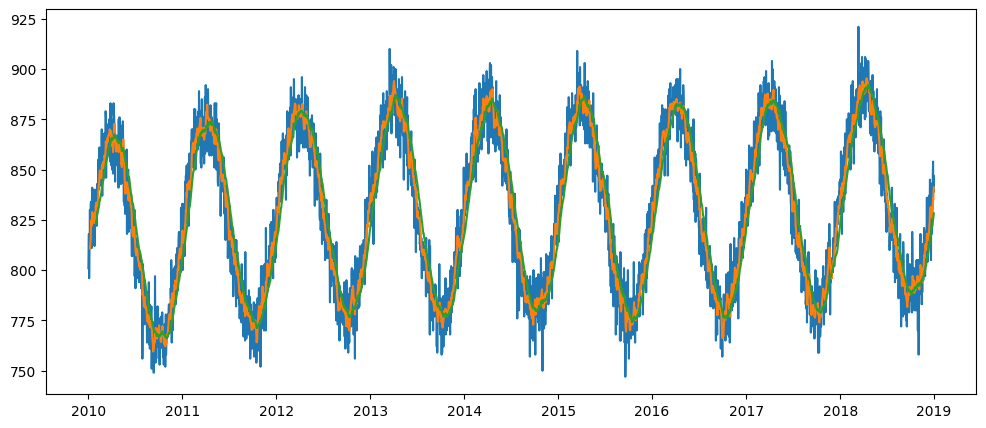

In [32]:
plt.figure(figsize=(12,5))
plt.plot(train)
plt.plot(train.rolling(window=7).mean())
plt.plot(train.rolling(window=30).mean())

<Axes: xlabel='Date'>

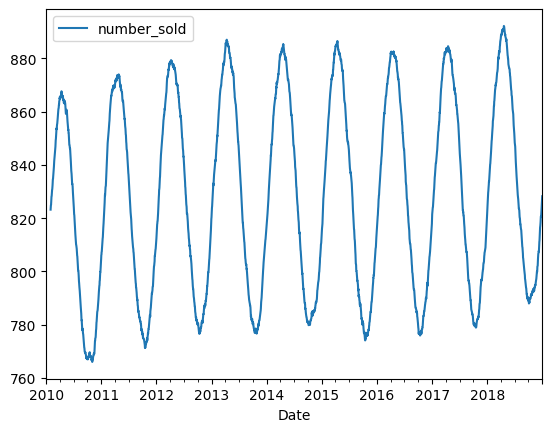

In [33]:
train.rolling(window=30).mean().plot()

<Axes: xlabel='Date'>

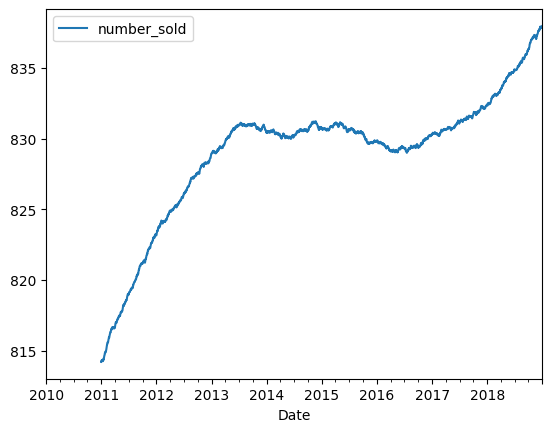

In [34]:
train.rolling(window=365).mean().plot()

## Сезонность

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

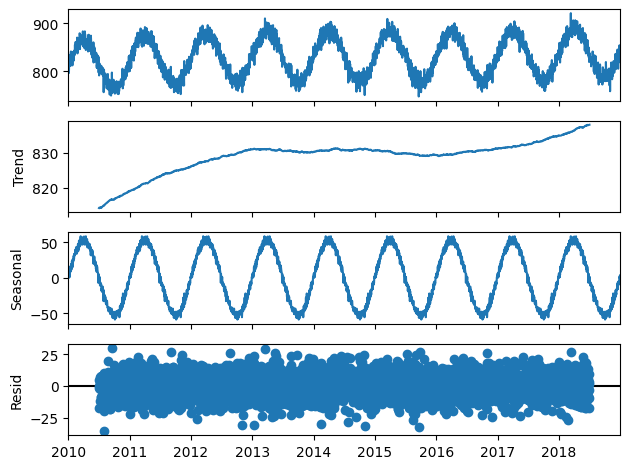

In [36]:
seasonal_decompose(train, model = 'additive', period = 365).plot()
plt.show()

## Лаги

In [37]:
train.head()

,number_sold
Date,
2010-01-01,801
2010-01-02,810
2010-01-03,818
2010-01-04,796
2010-01-05,808


In [38]:
train.shift(1).head()

,number_sold
Date,
2010-01-01,NaN
2010-01-02,801.0
2010-01-03,810.0
2010-01-04,818.0
2010-01-05,796.0


In [ ]:
train.shift(-1).head()

In [39]:
for i in range(1,7):
    string = f'lag{i}'
    train[string] = train['number_sold'].shift(i)
train.head(10)

,number_sold,lag1,lag2,lag3,lag4,lag5,lag6
Date,,,,,,,
2010-01-01,801,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,810,801.0,NaN,NaN,NaN,NaN,NaN
2010-01-03,818,810.0,801.0,NaN,NaN,NaN,NaN
2010-01-04,796,818.0,810.0,801.0,NaN,NaN,NaN
2010-01-05,808,796.0,818.0,810.0,801.0,NaN,NaN
2010-01-06,812,808.0,796.0,818.0,810.0,801.0,NaN
2010-01-07,830,812.0,808.0,796.0,818.0,810.0,801.0
2010-01-08,812,830.0,812.0,808.0,796.0,818.0,810.0
2010-01-09,817,812.0,830.0,812.0,808.0,796.0,818.0


<Axes: >

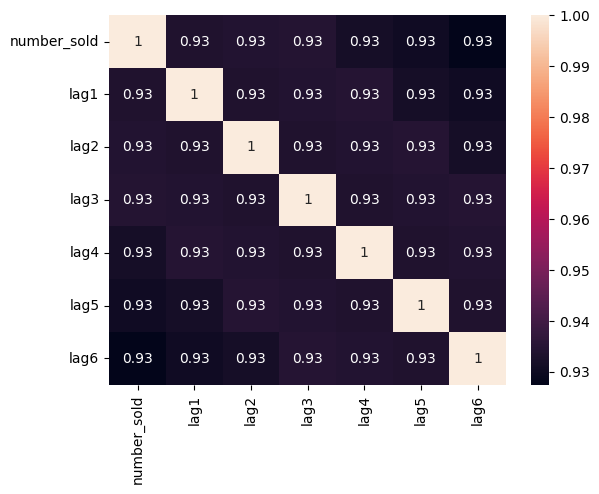

In [40]:
sns.heatmap(train.corr(), annot=True)

In [41]:
train.drop(list(train.columns[1:]), axis = 1, inplace = True)

<Axes: >

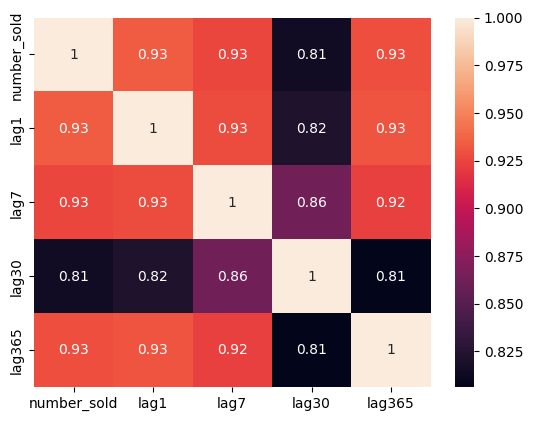

In [42]:
train['lag1'] = train['number_sold'].shift(1, axis = 0)
train['lag7'] = train['number_sold'].shift(7, axis = 0)
train['lag30'] = train['number_sold'].shift(30, axis = 0)
train['lag365'] = train['number_sold'].shift(365, axis = 0)

sns.heatmap(train.corr(), annot = True)

In [43]:
train.drop(list(train.columns[1:]), axis = 1, inplace = True)

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

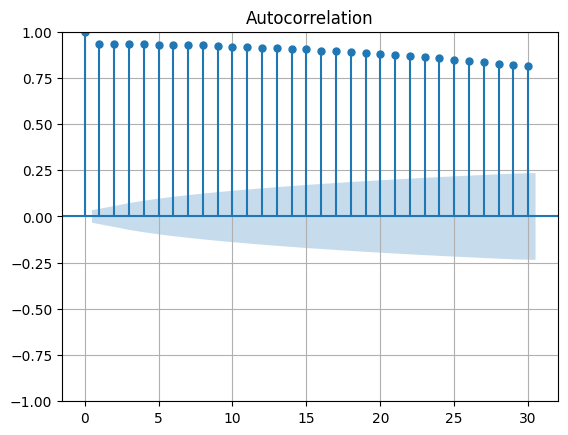

In [45]:
plot_acf(train, lags = 30)
plt.grid(True)
plt.show()

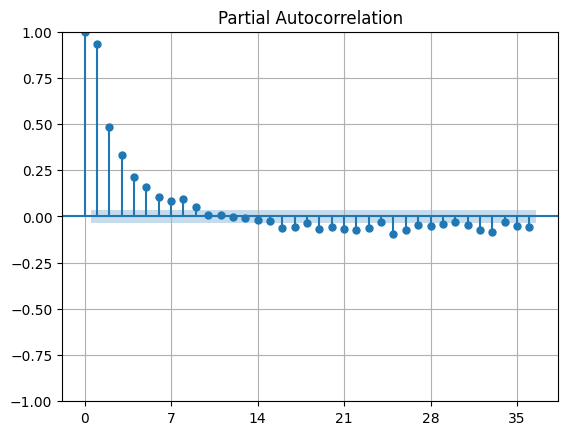

In [46]:
plot_pacf(train)
plt.xticks(range(0,40,7))
plt.grid(True)
plt.show()

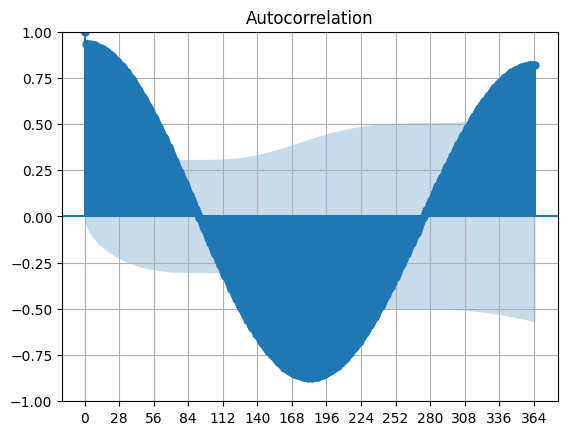

In [47]:
plot_acf(train, lags = 365)
plt.xticks(range(0,366, 28))

plt.grid(True)
plt.show()

## Прогнозирование

In [67]:
!pip install skforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.0/815.0 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.9 MB/s eta 0:00:00


In [68]:
from skforecast.recursive import ForecasterRecursive
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from sklearn.linear_model import LinearRegression

In [60]:
train.asfreq('D')

,number_sold
Date,
2010-01-01,801
2010-01-02,810
2010-01-03,818
2010-01-04,796
2010-01-05,808
...,...
2018-12-27,847
2018-12-28,854
2018-12-29,839


In [69]:
forecaster = ForecasterRecursive(
    regressor = LinearRegression(),
    lags = 365)

forecaster.fit(train['number_sold'])
forecaster

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ Series has a pandas DatetimeIndex without a frequency. The index will be replaced by │
│ a RangeIndex starting from 0 with a step of 1. To avoid this warning, set the        │
│ frequency of the DatetimeIndex using `y = y.asfreq('desired_frequency',              │
│ fill_value=np.nan)`.                                                                 │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : /usr/local/lib/python3.11/dist-packages/skforecast/utils/utils.py:1402    │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

=================== 
ForecasterRecursive 
=================== 
Regressor: LinearRegression 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365] 
Window features: None 
Window size: 365 
Series name: number_sold 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [0, 3286] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: 
    {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False} 
fit_kwargs: {} 
Creation date: 2025-06-14 12:09:08 
Last fit date: 2025-06-14 12:09:08 
Skforecast version: 0.16.0 
Python version: 3.11.13 
Forecaster id: None

In [70]:
steps = len(test)

y_pred = forecaster.predict(steps = steps)
y_pred.head()

╭──────────────────────────────────── IndexWarning ────────────────────────────────────╮
│ `last_window` has a pandas DatetimeIndex without a frequency. The index will be      │
│ replaced by a RangeIndex starting from 0 with a step of 1. To avoid this warning,    │
│ set the frequency of the DatetimeIndex using `last_window =                          │
│ last_window.asfreq('desired_frequency', fill_value=np.nan)`.                         │
│                                                                                      │
│ Category : IndexWarning                                                              │
│ Location : /usr/local/lib/python3.11/dist-packages/skforecast/utils/utils.py:1446    │
│ Suppress : warnings.simplefilter('ignore', category=IndexWarning)                    │
╰──────────────────────────────────────────────────────────────────────────────────────╯

,pred
365,849.761321
366,849.948392
367,844.713549
368,840.942432
369,844.462456


In [71]:
y_pred.index=test.index

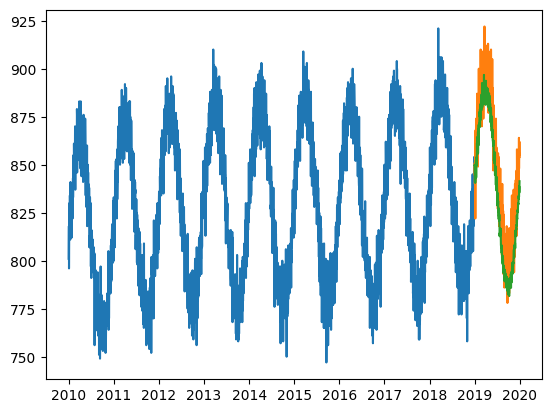

In [72]:
plt.plot(train)
plt.plot(test)
plt.plot(y_pred)